# Dungeons & Dragons Data Research

This notebook analyzes the D&D 5e data available in the `data/dnd-data` directory. We will explore Monsters, Spells, and Items.

In [2]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

## 1. Data Loading

We define a helper function to load the JSON data into Pandas DataFrames.

In [3]:
DATA_DIR = '../data/dnd-data/data'

def load_data(filename):
    filepath = os.path.join(DATA_DIR, filename)
    with open(filepath, 'r') as f:
        data = json.load(f)
    return pd.DataFrame(data)

# Load datasets
monsters_df = load_data('monsters.json')
spells_df = load_data('spells.json')
items_df = load_data('items.json')
classes_df = load_data('classes.json')
species_df = load_data('species.json')
backgrounds_df = load_data('backgrounds.json')

print("Data loaded successfully!")
print(f"Monsters: {monsters_df.shape}")
print(f"Spells: {spells_df.shape}")
print(f"Items: {items_df.shape}")

Data loaded successfully!
Monsters: (11463, 5)
Spells: (5849, 5)
Items: (15749, 5)


## Data Normalisation

In [4]:
monsters_df_n = pd.json_normalize(monsters_df['properties'].apply(lambda x: json.loads(x) if isinstance(x, str) else x))
monsters_df_n['Name'] = monsters_df['name']

cols = monsters_df_n.columns.tolist()
cols.insert(0, cols.pop(cols.index('Name')))
monsters_df_n = monsters_df_n[cols]

monsters_df_n.head()

,Name,Category,Size,Type,Alignment,Expansion,Challenge Rating,Source,AC,HP,...,Condition Immunities,Roll 4,Resistances,PB,Vulnerabilities,data-Reactions,Hit Dice,data-Bonus Actions,Spellcasting Ability,Legendary Roll 0
0,A-mi-kuk,Monsters,Huge,aberration,chaotic evil,8073.0,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalpamac,Monsters,Huge,monstrosity,unaligned,8073.0,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aarakocra,Monsters,Medium,humanoid (aarakocra),neutral good,2.0,1/4,MM1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aarakocra Brave,Monsters,Medium,Humanoid (Aarakocra),Typically Neutral Good,17751.0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aarakocra Scout,Monsters,Medium,Humanoid (Aarakocra),Typically Neutral Good,17751.0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
monsters_df_n.columns

Index(['Name', 'Category', 'Size', 'Type', 'Alignment', 'Expansion',
       'Challenge Rating', 'Source', 'AC', 'HP', 'CHA', 'CON', 'DEX', 'INT',
       'STR', 'WIS', 'Speed', 'Token', 'Roll 0', 'Roll 1', 'Senses', 'Skills',
       'data-XP', 'Languages', 'data-List', 'Token Size', 'data-LANum',
       'data-Traits', 'data-Actions', 'data-CHA-mod', 'data-CON-mod',
       'data-DEX-mod', 'data-INT-mod', 'data-STR-mod', 'data-SizeNum',
       'data-WIS-mod', 'Saving Throws', 'Passive Perception',
       'data-Legendary Actions', 'data-CrNum', 'data-AcNum', 'data-HpNum',
       'Spell Book', 'data-Spells', 'Roll 2', 'Roll 3', 'Immunities',
       'Condition Immunities', 'Roll 4', 'Resistances', 'PB',
       'Vulnerabilities', 'data-Reactions', 'Hit Dice', 'data-Bonus Actions',
       'Spellcasting Ability', 'Legendary Roll 0'],
      dtype='object')

In [6]:
spells_df_n = pd.json_normalize(spells_df['properties'].apply(lambda x: json.loads(x) if isinstance(x, str) else x))

spells_df_n['Level'] = pd.to_numeric(spells_df_n['Level'], errors='coerce')

for col in spells_df_n.columns:
    if spells_df_n[col].dtype == 'object': # Check if the column is of string type (object)
        spells_df_n[col] = spells_df_n[col].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)


spells_df_n['Name'] = spells_df['name']
spells_df_n.head()

cols = spells_df_n.columns.tolist()
cols.insert(0, cols.pop(cols.index('Name')))
spells_df_n = spells_df_n[cols]


spells_df_n.head()

,Name,Category,Level,School,Components,Damage Type,Casting Time,data-RangeAoe,Expansion,Save,...,Ritual,Concentration,data-AttackType,Source,Saving Throws,Healing,Add Casting Modifier,Save Success,Secondary Damage,Secondary Damage Type
0,A Distant Cry,spells,3.0,conjuration,"v, s, m",cold,1 action,self,NaN,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Abberate,spells,2.0,transmutation,"v, s",nan,1 action,nan,26275.0,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Abduct,spells,7.0,conjuration,"v, s, m",nan,1 minute,1 mile,26275.0,charisma,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Aberrate,spells,2.0,(hag) transmutation,"v, s, m",nan,3 minutes,15 feet,NaN,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Abeyed Discharge,spells,4.0,evocation,"v, s",force,1 action,120 feet,NaN,constitution,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [7]:
spells_df_n.columns

Index(['Name', 'Category', 'Level', 'School', 'Components', 'Damage Type',
       'Casting Time', 'data-RangeAoe', 'Expansion', 'Save', 'Range', 'Damage',
       'Target', 'Classes', 'Duration', 'Material', 'data-List',
       'Spell Attack', 'data-CastNum', 'data-RangeNum', 'data-DurationNum',
       'data-description', 'Higher Spell Slot Die', 'Higher Spell Slot Desc',
       'Higher Spell Slot Dice', 'data-Cantrip Scaling', 'filter-Tags',
       'filter-Level', 'filter-Range', 'filter-Ritual', 'filter-Upcast',
       'filter-Duration', 'data-datarecords', 'filter-Components',
       'filter-Casting Time', 'filter-Concentration', 'Ritual',
       'Concentration', 'data-AttackType', 'Source', 'Saving Throws',
       'Healing', 'Add Casting Modifier', 'Save Success', 'Secondary Damage',
       'Secondary Damage Type'],
      dtype='object')

In [8]:
items_df_n = pd.json_normalize(items_df['properties'].apply(lambda x: json.loads(x) if isinstance(x, str) else x))
items_df_n['Name'] = items_df['name']

import numpy as np

for col in items_df_n.columns:
    if items_df_n[col].dtype == 'object': # Check if the column is of string type (object)
        items_df_n[col] = items_df_n[col].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)
        items_df_n[col] = items_df_n[col].replace('nan', np.nan)

cols = items_df_n.columns.tolist()
cols.insert(0, cols.pop(cols.index('Name')))
items_df_n = items_df_n[cols]

items_df_n.head()


,Name,Category,Item Type,Item Rarity,Expansion,Requires Attunement,Source,Weight,data-List,data-RarityNum,...,Duration,Alternate Damage,Alternate Damage Type,Secondary Damage,Mastery,filter-Consumable,data-Bundle,data-Ranged,data-Weapon Description,data-Attack Description
0,1st level spell scroll,items,scroll,common,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2nd level spell scroll,items,scroll,uncommon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a revised history of the world,items,wondrous item,artifact,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a trip away inn tablet,items,wondrous item,uncommon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aastrika's crown,items,wondrous item,rare,28288.0,requires attunement,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
items_df_n.columns

Index(['Name', 'Category', 'Item Type', 'Item Rarity', 'Expansion',
       'Requires Attunement', 'Source', 'Weight', 'data-List',
       'data-RarityNum', 'Properties', 'Range', 'Damage', 'Subtype',
       'Damage Type', 'Theme', 'filter-Lists', 'filter-Charges',
       'filter-Attunement', 'AC', 'data-datarecords', 'data-description',
       'Stealth', 'filter-Damage', 'Save', 'Modifiers', 'Target', 'Duration',
       'Alternate Damage', 'Alternate Damage Type', 'Secondary Damage',
       'Mastery', 'filter-Consumable', 'data-Bundle', 'data-Ranged',
       'data-Weapon Description', 'data-Attack Description'],
      dtype='object')

In [10]:
classes_df_n = pd.json_normalize(classes_df['properties'].apply(lambda x: json.loads(x) if isinstance(x, str) else x))
classes_df_n['Name'] = classes_df['name']
cols = classes_df_n.columns.tolist()
cols.insert(0, cols.pop(cols.index('Name')))
classes_df_n = classes_df_n[cols]

classes_df_n.head()


,Name,Category,Expansion,Hit Die,data-List,Starting Gold,Subclass Name,data-Equipment,data-builderImage,data-Saving Throws,...,filter-Armor Proficiency,filter-Caster Progression,filter-Weapon Proficiency,data-Spell Replace,Spellcasting Ability,filter-Spell Type,Caster Progression,Source,data-description,data-Spell Add
0,Accursed,Classes,20542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acolyte,Classes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Adept,Classes,27051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alchemist,Classes,26275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Animal Master,Classes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
classes_df_n.columns

Index(['Name', 'Category', 'Expansion', 'Hit Die', 'data-List',
       'Starting Gold', 'Subclass Name', 'data-Equipment', 'data-builderImage',
       'data-Saving Throws', 'Suggested Abilities', 'data-Subclass Level',
       'data-Ability Score Levels', 'filter-Hit Die', 'data-datarecords',
       'filter-Primary Ability', 'filter-Armor Proficiency',
       'filter-Caster Progression', 'filter-Weapon Proficiency',
       'data-Spell Replace', 'Spellcasting Ability', 'filter-Spell Type',
       'Caster Progression', 'Source', 'data-description', 'data-Spell Add'],
      dtype='object')

In [12]:
species_df_n = pd.json_normalize(species_df['properties'].apply(lambda x: json.loads(x) if isinstance(x, str) else x))
species_df_n['Name'] = species_df['name']
cols = species_df_n.columns.tolist()
cols.insert(0, cols.pop(cols.index('Name')))
species_df_n = species_df_n[cols]

species_df_n.head()

,Name,Category,Expansion,Size,Speed,data-List,data-builderImage,data-Ability Score Increase,filter-Size,filter-Type,filter-Shape,filter-Defenses,data-datarecords,filter-Darkvision,filter-Natural Armor,filter-Special Senses,filter-Natural Attacks,filter-Innate Spellcasting,filter-Proficiencies,data-Ability Score Choice
0,Aarakocra,Races,14934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aarakocra,Races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aarakocra (EGTW),Races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aasimar,Races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aasimar,Races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
species_df_n.columns

Index(['Name', 'Category', 'Expansion', 'Size', 'Speed', 'data-List',
       'data-builderImage', 'data-Ability Score Increase', 'filter-Size',
       'filter-Type', 'filter-Shape', 'filter-Defenses', 'data-datarecords',
       'filter-Darkvision', 'filter-Natural Armor', 'filter-Special Senses',
       'filter-Natural Attacks', 'filter-Innate Spellcasting',
       'filter-Proficiencies', 'data-Ability Score Choice'],
      dtype='object')

## 2. Deep Dive: Monster Distributions

Let's explore the demographics of the Monster Manual (and beyond). We'll look at sizes, types, alignments, and the distribution of raw stats.

/tmp/ipykernel_136693/2001950420.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=monsters_df_n, x='Size_Clean', palette='pastel', order=monsters_df_n['Size_Clean'].value_counts().iloc[:10].index)


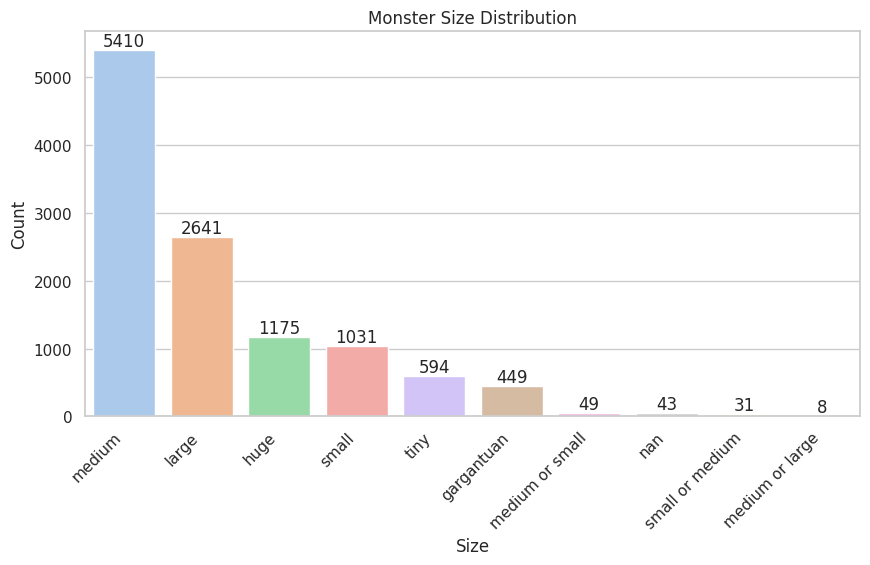

/tmp/ipykernel_136693/2001950420.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=monsters_df_n, x='Size_Clean', palette='pastel', order=monsters_df_n['Size_Clean'].value_counts().iloc[:10].index)


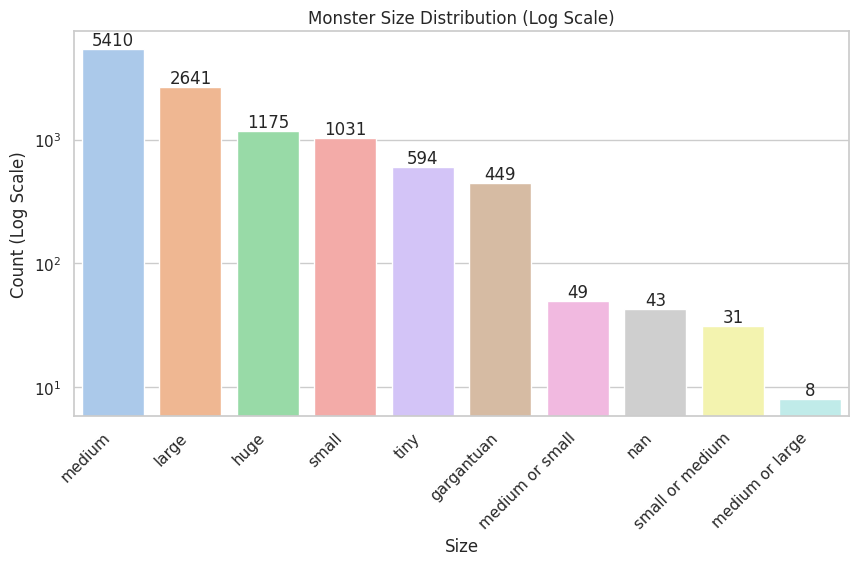

In [80]:
# Clean Ability Scores
ability_scores = ['STR', 'DEX', 'CON', 'INT', 'WIS', 'CHA']
for score in ability_scores:
    monsters_df_n[score + '_Clean'] = pd.to_numeric(monsters_df_n[score], errors='coerce')

monsters_df_n['AC_Clean'] = monsters_df_n['AC'].astype(str).str.extract(r'(\d+)').astype(float)
monsters_df_n['HP_Clean'] = monsters_df_n['HP'].astype(str).str.extract(r'(\d+)\s*\(?').astype(float)



# Clean Size
monsters_df_n['Size_Clean'] = monsters_df_n['Size'].astype(str).str.lower().str.replace(r'\s*\(.*\)', '', regex=True).str.strip()

# 1. Size Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=monsters_df_n, x='Size_Clean', palette='pastel', order=monsters_df_n['Size_Clean'].value_counts().iloc[:10].index)
plt.title('Monster Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()

# 2. Size Distribution (Log Scale)
plt.figure(figsize=(10, 5))
sns.countplot(data=monsters_df_n, x='Size_Clean', palette='pastel', order=monsters_df_n['Size_Clean'].value_counts().iloc[:10].index)
plt.title('Monster Size Distribution (Log Scale)')
plt.xlabel('Size')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.xticks(rotation=45, ha='right')
plt.show()



/tmp/ipykernel_136693/2317619315.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=monsters_df_n, y='Type_Clean', order=top_types, palette='muted')


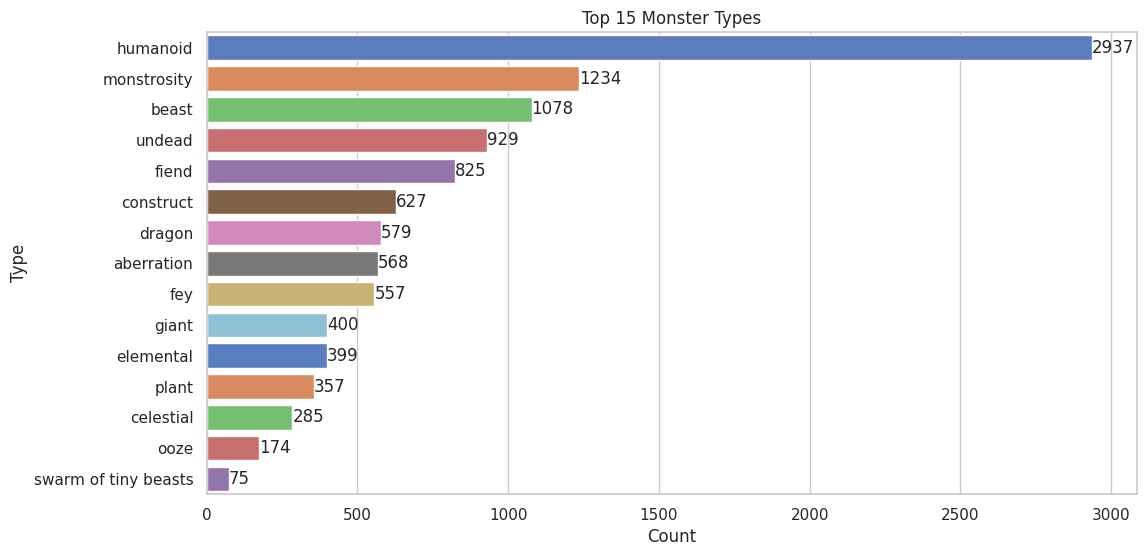

In [16]:
# Clean Types
monsters_df_n['Type_Clean'] = monsters_df_n['Type'].str.lower().str.replace(r'\s*\(.*\)', '', regex=True).str.strip()

# Type Distribution (Top 15)
plt.figure(figsize=(12, 6))
top_types = monsters_df_n['Type_Clean'].value_counts().head(15).index
sns.countplot(data=monsters_df_n, y='Type_Clean', order=top_types, palette='muted')
plt.title('Top 15 Monster Types')
plt.xlabel('Count')
plt.ylabel('Type')
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()


/tmp/ipykernel_136693/1980386388.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, y='Alignment_Clean', order=top_alignments, palette='coolwarm')


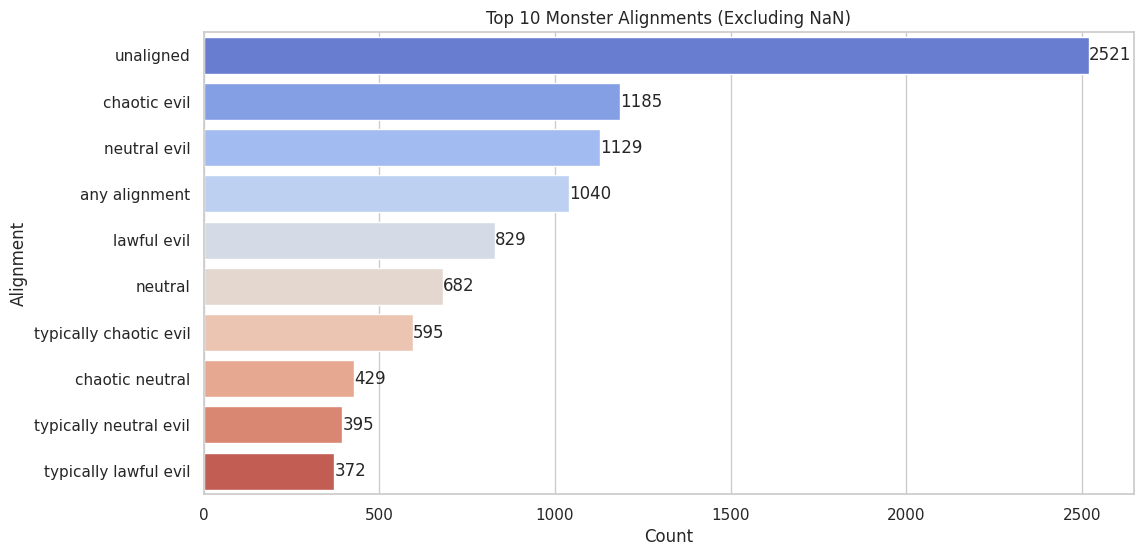

In [17]:
monsters_df_n['Alignment_Clean'] = monsters_df_n['Alignment'].str.lower().str.replace(r'\s*\(.*\)', '', regex=True).str.strip()

# Filter out NaN values from 'Alignment_Clean' before plotting
plot_data = monsters_df_n[monsters_df_n['Alignment_Clean'].notna()]

# 3. Alignment Distribution (Top 10)
plt.figure(figsize=(12, 6))
top_alignments = plot_data['Alignment_Clean'].value_counts().head(10).index
sns.countplot(data=plot_data, y='Alignment_Clean', order=top_alignments, palette='coolwarm')
plt.title('Top 10 Monster Alignments (Excluding NaN)')
plt.xlabel('Count')
plt.ylabel('Alignment')
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()

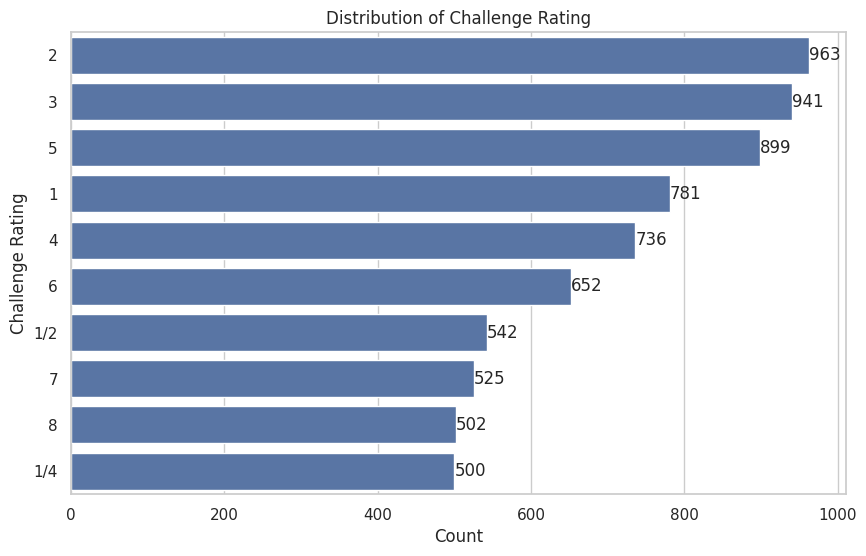

In [18]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(y='Challenge Rating', data=monsters_df_n, order=monsters_df_n['Challenge Rating'].value_counts().head(10).index)
plt.title('Distribution of Challenge Rating')
plt.xlabel('Count')
plt.ylabel('Challenge Rating')
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()


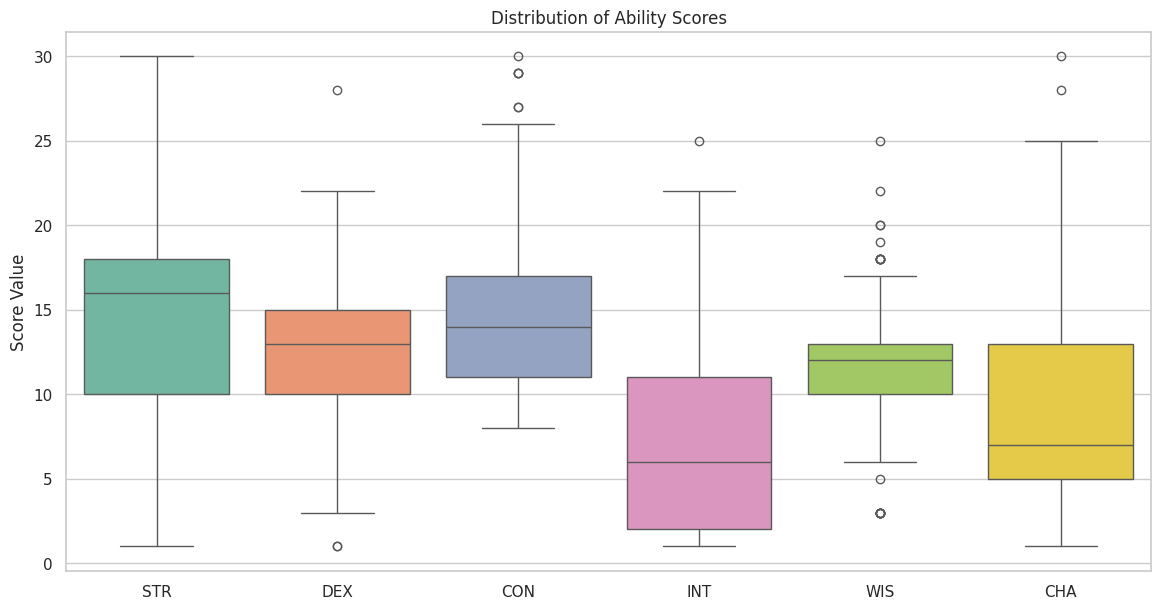

/tmp/ipykernel_136693/2628897755.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(filtered_total_ability_score, kde=True, bins=30, palette='viridis')


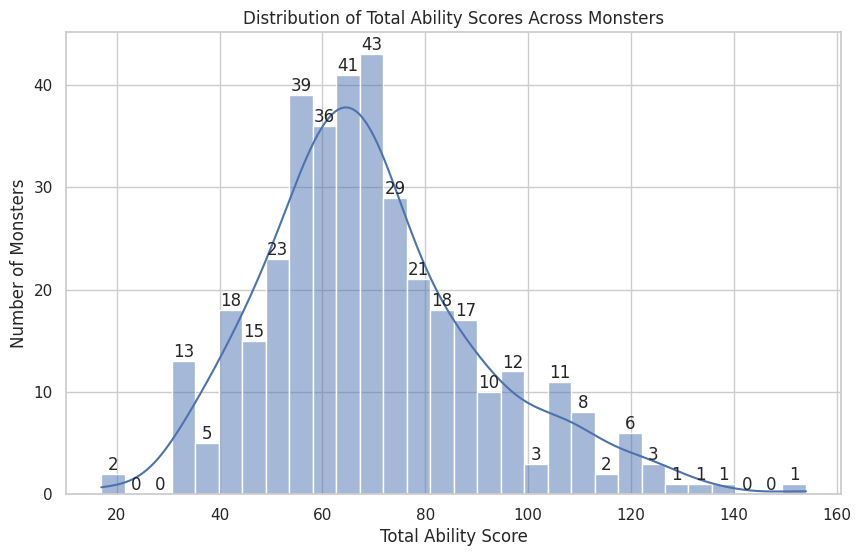

In [19]:
# 5. Ability Score Distributions
plt.figure(figsize=(14, 7))
clean_scores = [score + '_Clean' for score in ability_scores]
sns.boxplot(data=monsters_df_n[clean_scores], palette='Set2')
plt.title('Distribution of Ability Scores')
plt.ylabel('Score Value')
plt.xticks(range(6), ability_scores) # Rename x-axis labels back to clean names
plt.show()

monsters_df_n['Total_Ability_Score'] = monsters_df_n[clean_scores].sum(axis=1)
filtered_total_ability_score = monsters_df_n['Total_Ability_Score'].replace(0, pd.NA).dropna()
plt.figure(figsize=(10, 6))
sns.histplot(filtered_total_ability_score, kde=True, bins=30, palette='viridis')
plt.title('Distribution of Total Ability Scores Across Monsters')
plt.xlabel('Total Ability Score')
plt.ylabel('Number of Monsters')
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.show()


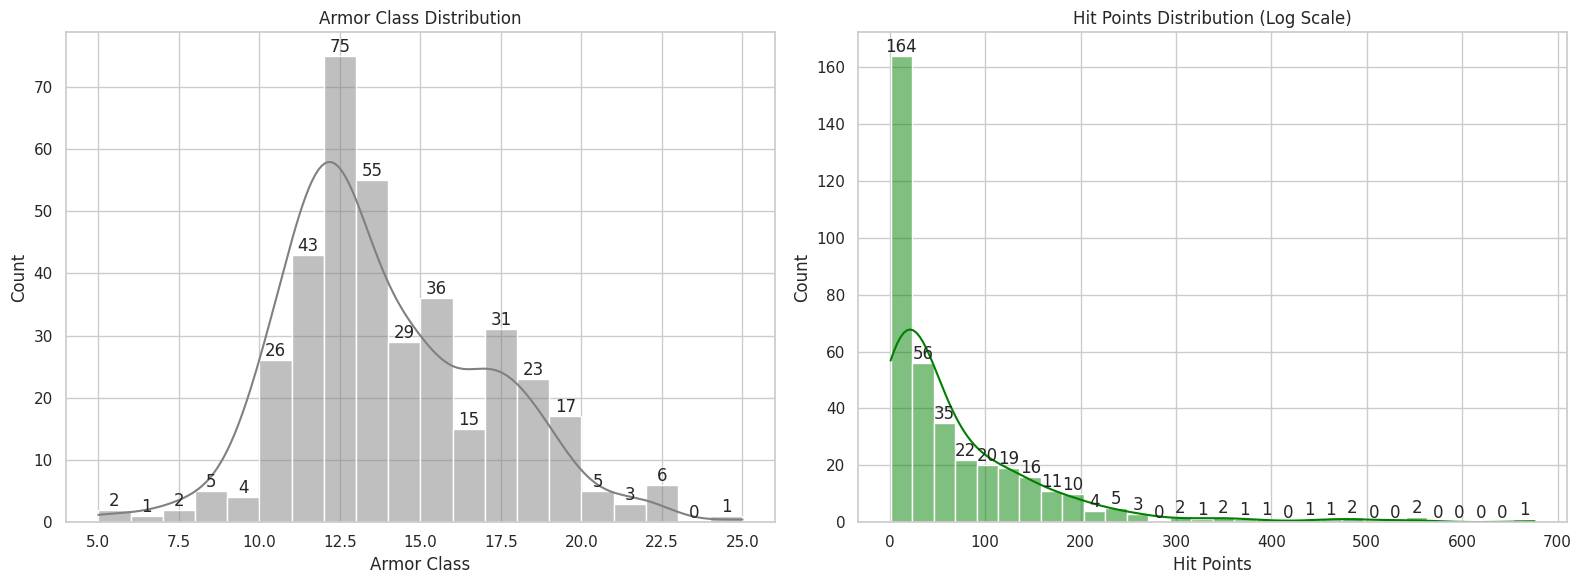

In [20]:
# 6. AC and HP Distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# AC
sns.histplot(data=monsters_df_n, x='AC_Clean', bins=20, kde=True, ax=axes[0], color='gray')
axes[0].set_title('Armor Class Distribution')
axes[0].set_xlabel('Armor Class')
for container in axes[0].containers:
    axes[0].bar_label(container)




# HP (Log Scale for better visibility of massive monsters)
sns.histplot(data=monsters_df_n, x='HP_Clean', bins=30, kde=True, ax=axes[1], color='green', log_scale=False)
axes[1].set_title('Hit Points Distribution (Log Scale)')
axes[1].set_xlabel('Hit Points')
for container in axes[1].containers:
    axes[1].bar_label(container)


plt.tight_layout()
plt.show()

## 3. Deep Dive: Spell Distributions

We will analyze the distribution of spells by Level, School, Casting Time, Range, and Components.

/tmp/ipykernel_136693/2052243646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spells_df_n, x='Level', palette='viridis', order=sorted(spells_df_n['Level'].unique()))


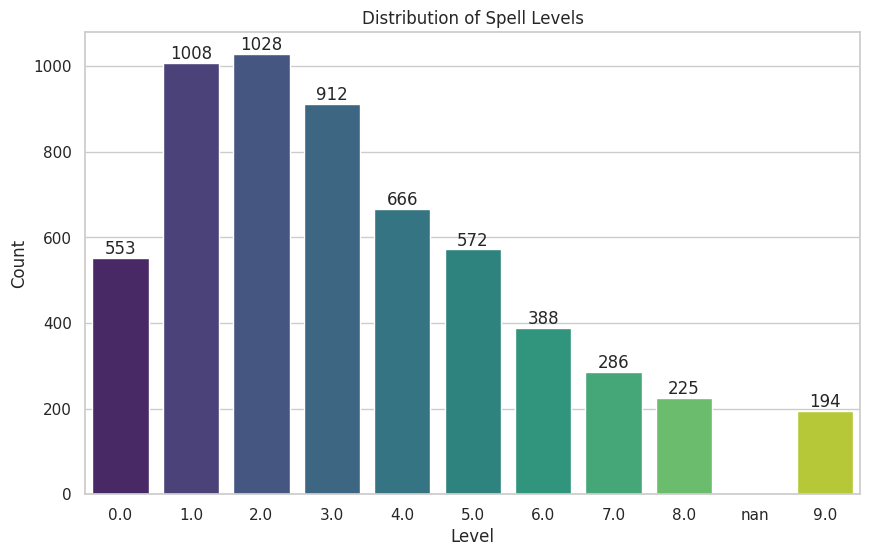

In [21]:
# Spell Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=spells_df_n, x='Level', palette='viridis', order=sorted(spells_df_n['Level'].unique()))
plt.title('Distribution of Spell Levels')
plt.xlabel('Level')
plt.ylabel('Count')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()

/tmp/ipykernel_136693/2737897159.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_counts.values, y=school_counts.index, palette='magma')


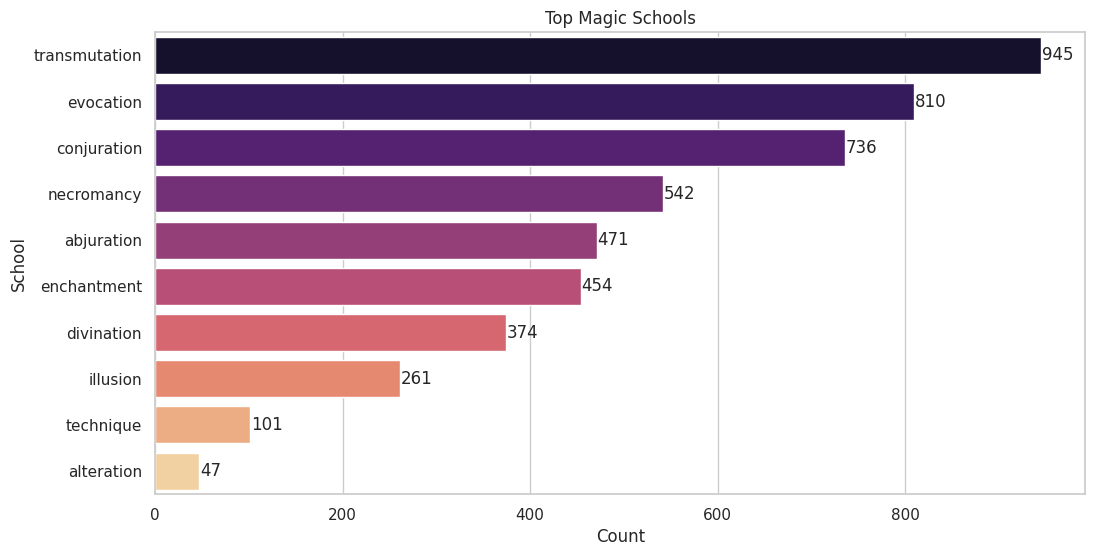

In [22]:
# Spell School Distribution
plt.figure(figsize=(12, 6))
school_counts = spells_df_n['School'].value_counts().head(10)
sns.barplot(x=school_counts.values, y=school_counts.index, palette='magma')
plt.title('Top Magic Schools')
plt.xlabel('Count')
plt.ylabel('School')
for i, v in enumerate(school_counts.values):
    plt.text(v + 1, i, str(v), va='center', ha='left')
plt.show()

/tmp/ipykernel_136693/3071230561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_counts.values, y=time_counts.index, palette='rocket')


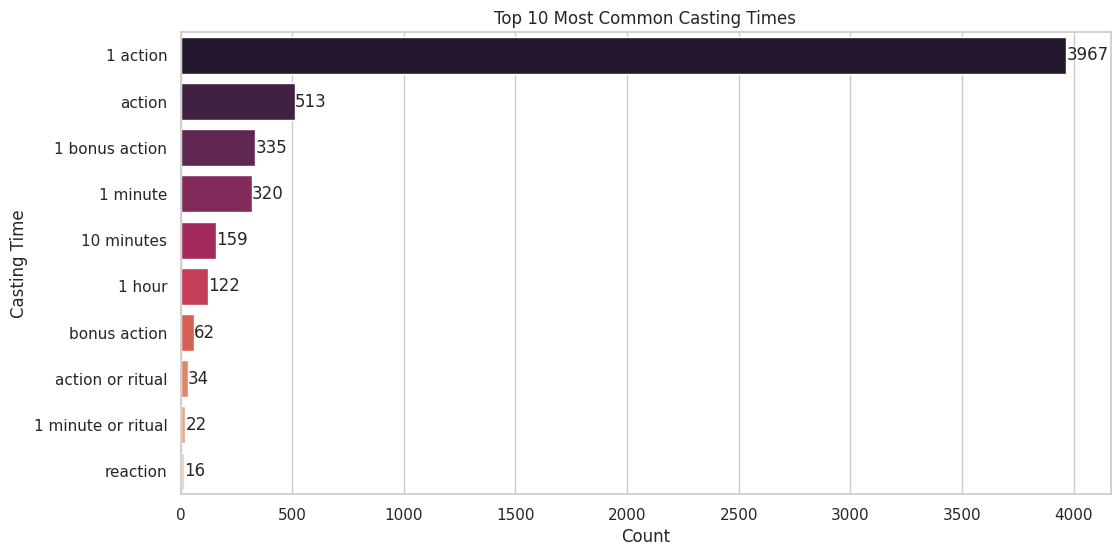

In [23]:
# Casting Time Distribution
plt.figure(figsize=(12, 6))
time_counts = spells_df_n['Casting Time'].value_counts().head(10)
sns.barplot(x=time_counts.values, y=time_counts.index, palette='rocket')
plt.title('Top 10 Most Common Casting Times')
plt.xlabel('Count')
plt.ylabel('Casting Time')
for i, v in enumerate(time_counts.values):
    plt.text(v + 0.1, i, str(v), va='center', ha='left')
plt.show()

/tmp/ipykernel_136693/2001215084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.values, y=range_counts.index, palette='crest')


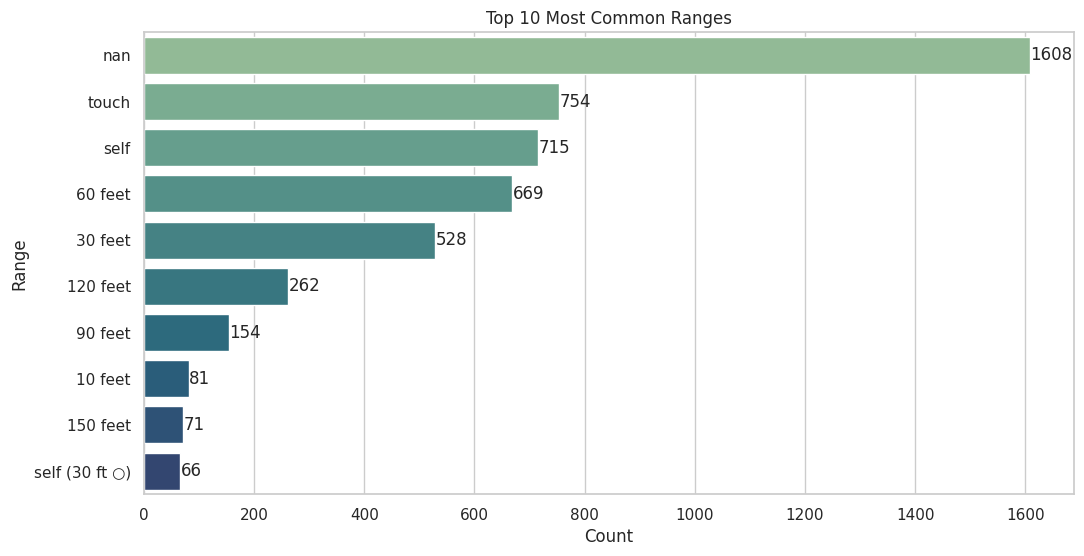

In [24]:
# Range Distribution
plt.figure(figsize=(12, 6))
range_counts = spells_df_n['data-RangeAoe'].dropna().value_counts().head(10)
sns.barplot(x=range_counts.values, y=range_counts.index, palette='crest')
plt.title('Top 10 Most Common Ranges')
plt.xlabel('Count')
plt.ylabel('Range')
for i, v in enumerate(range_counts.values):
    plt.text(v + 1, i, str(v), va='center', ha='left')
plt.show()

/tmp/ipykernel_136693/182610078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_counts.values, y=comp_counts.index, palette='mako')


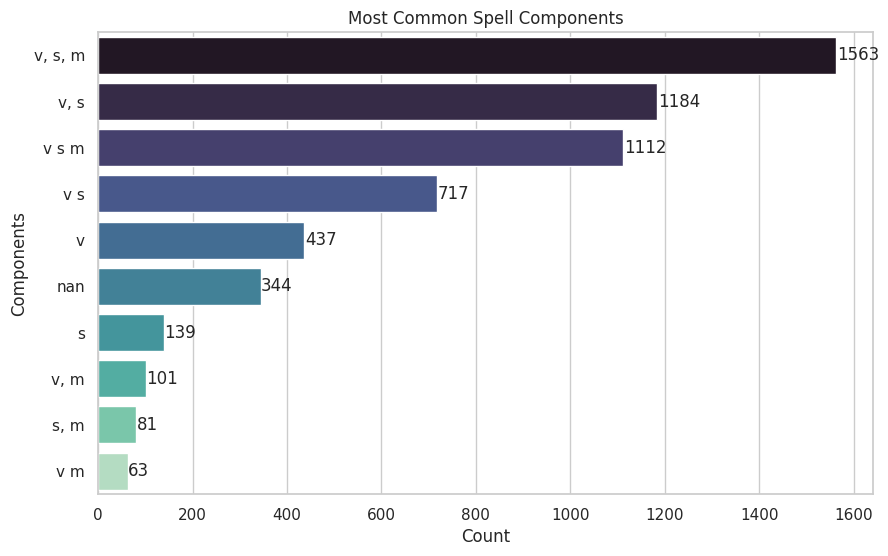

In [25]:
# Components Analysis
# Simplify components to V, S, M combinations
plt.figure(figsize=(10, 6))
comp_counts = spells_df_n['Components'].value_counts().head(10)
sns.barplot(x=comp_counts.values, y=comp_counts.index, palette='mako')
plt.title('Most Common Spell Components')
plt.xlabel('Count')
plt.ylabel('Components')
for i, v in enumerate(comp_counts.values):
    plt.text(v + 1, i, str(v), va='center', ha='left')
plt.show()

## 3.1 Advanced Spell Statistics

Further analysis on Damage Types, Saving Throws, and other properties.

/tmp/ipykernel_136693/93127294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=damage_counts.values, y=damage_counts.index, palette='flare')


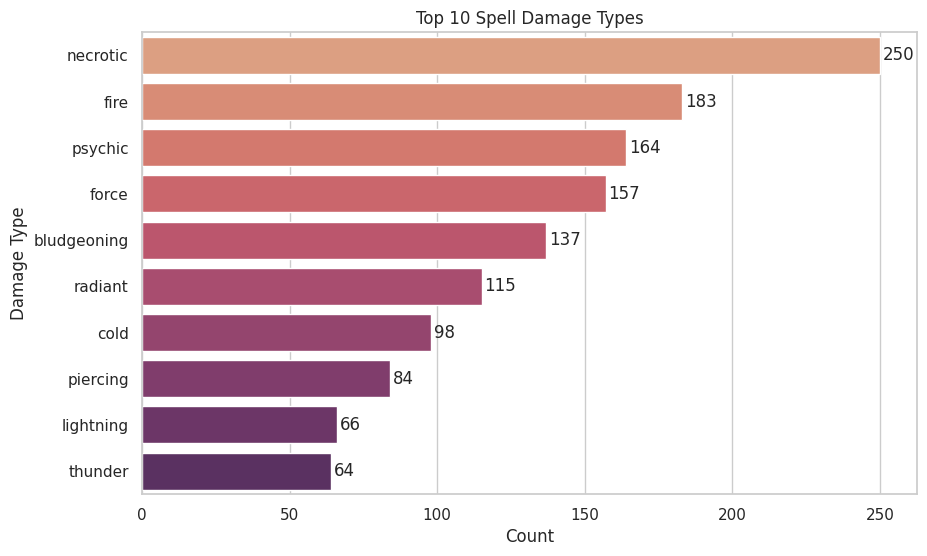

In [26]:
# Damage Type Distribution
damage_counts = spells_df_n['Damage Type'].dropna().value_counts()
damage_counts = damage_counts[~damage_counts.index.astype(str).str.lower().str.contains('nan')].head(10)
sns.barplot(x=damage_counts.values, y=damage_counts.index, palette='flare')
plt.title('Top 10 Spell Damage Types')
plt.xlabel('Count')
plt.ylabel('Damage Type')
for i, v in enumerate(damage_counts.values):
    plt.text(v + 1, i, str(v), va='center', ha='left')
plt.show()

/tmp/ipykernel_136693/2117545597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=save_counts.values, y=save_counts.index, palette='muted')


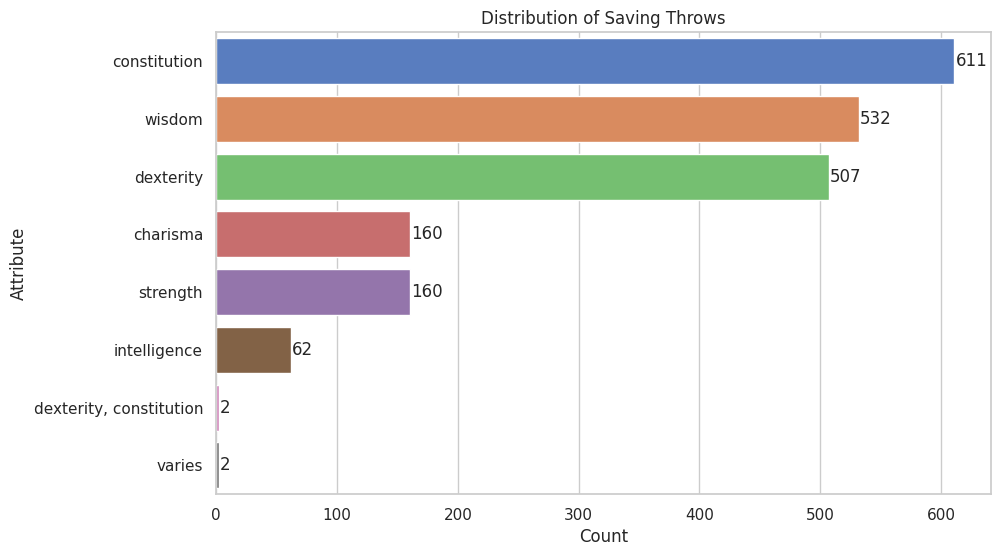

In [27]:
# Saving Throw Distribution
plt.figure(figsize=(10, 6))
save_counts = spells_df_n['Save'].dropna().value_counts()
save_counts = save_counts[~save_counts.index.astype(str).str.lower().str.contains('nan')].head(8)
sns.barplot(x=save_counts.values, y=save_counts.index, palette='muted')
plt.title('Distribution of Saving Throws')
plt.xlabel('Count')
plt.ylabel('Attribute')
for i, v in enumerate(save_counts.values):
    plt.text(v + 1, i, str(v), va='center', ha='left')
plt.show()

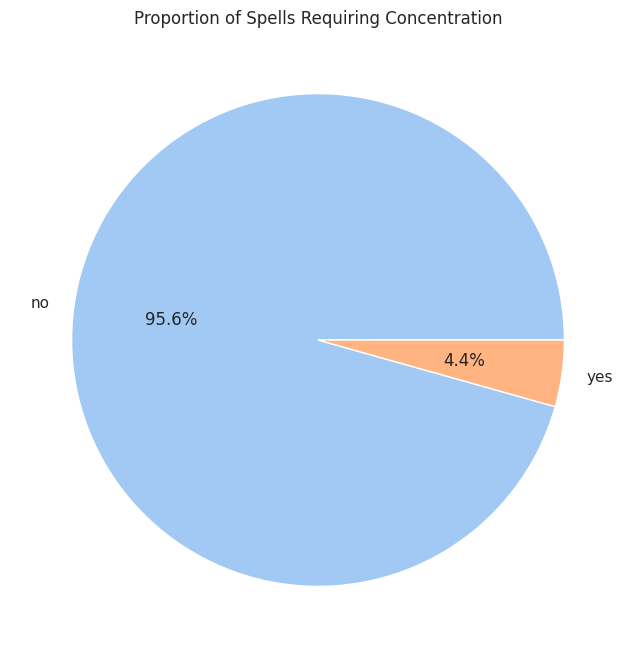

In [28]:
# Concentration Analysis
plt.figure(figsize=(8, 8))
conc_counts = spells_df_n['Concentration'].replace('nan', 'no').value_counts()
plt.pie(conc_counts, labels=conc_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Spells Requiring Concentration')
plt.show()

/tmp/ipykernel_136693/226592499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chart_data, x='Damage', palette='viridis', order=damage_order)


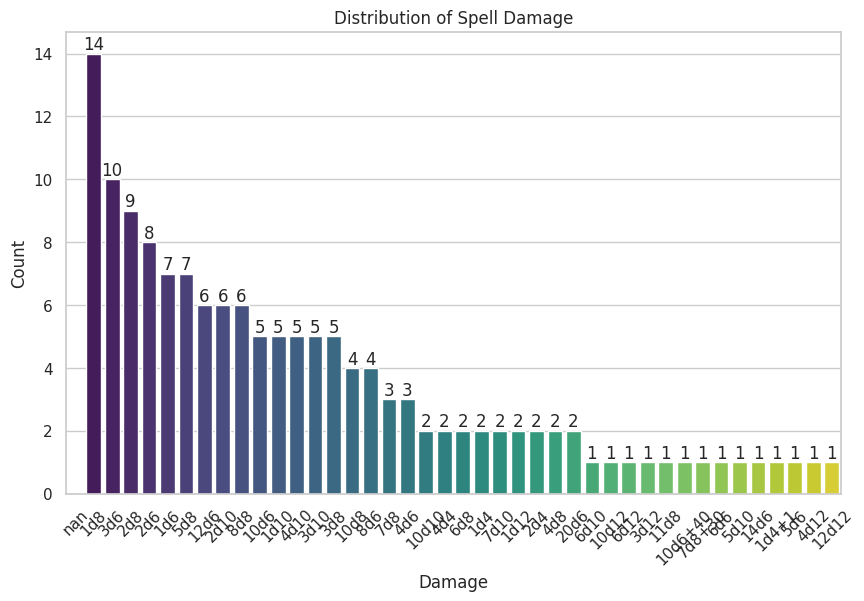

In [29]:
chart_data = spells_df_n[spells_df_n['Damage'] != 'nan']
damage_order = spells_df_n['Damage'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(data=chart_data, x='Damage', palette='viridis', order=damage_order)
plt.title('Distribution of Spell Damage')
plt.xlabel('Damage')
plt.ylabel('Count')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.xticks(rotation=45)
plt.show()

In [30]:
spells_df_n[spells_df_n['Healing'] != 'nan'][['Healing','Name']]

,Healing,Name
1315,1d8,Cure Wounds
2729,70,Heal
2738,1d4,Healing Word
3490,3d8,Mass Cure Wounds
3501,1d4,Mass Healing Word
4050,2d8,Prayer of Healing


/tmp/ipykernel_136693/3346057281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=healing_df, x='Healing', palette='viridis', order=healing_order)


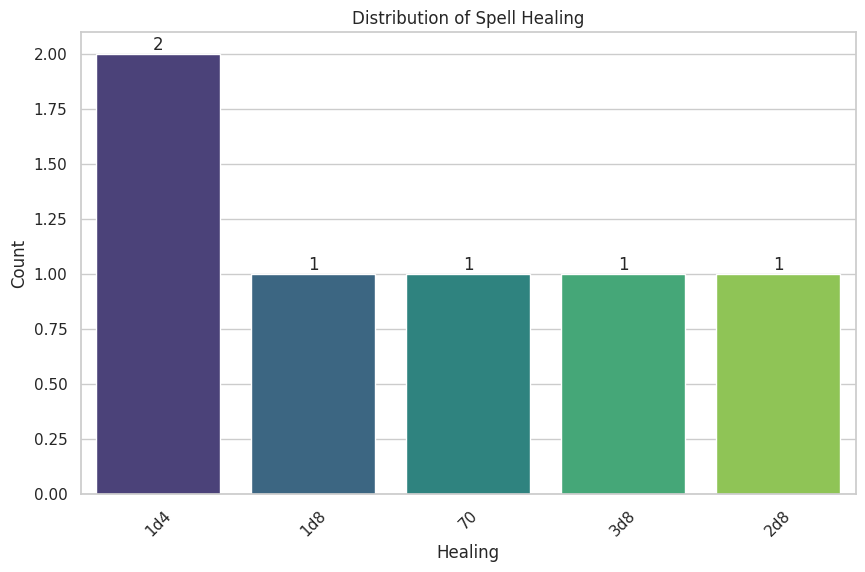

In [31]:
healing_df = spells_df_n[spells_df_n['Healing'] != 'nan']
healing_order = healing_df['Healing'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(data=healing_df, x='Healing', palette='viridis', order=healing_order)
plt.title('Distribution of Spell Healing')
plt.xlabel('Healing')
plt.ylabel('Count')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.xticks(rotation=45)
plt.show()

## 4. Deep Dive: Item Distributions

Analyzing various attributes of Items such as Category, Rarity, Type, and combat properties.

In [45]:
items_df_n.head()

,Name,Category,Item Type,Item Rarity,Expansion,Requires Attunement,Source,Weight,data-List,data-RarityNum,...,Secondary Damage,Mastery,filter-Consumable,data-Bundle,data-Ranged,data-Weapon Description,data-Attack Description,Has_Attunement,Weight_Num,AC_Num
0,1st level spell scroll,items,scroll,common,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
1,2nd level spell scroll,items,scroll,uncommon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,a revised history of the world,items,wondrous item,artifact,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
3,a trip away inn tablet,items,wondrous item,uncommon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4,aastrika's crown,items,wondrous item,rare,28288.0,requires attunement,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


/tmp/ipykernel_136693/982241152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.values, y=type_counts.index, palette='coolwarm')


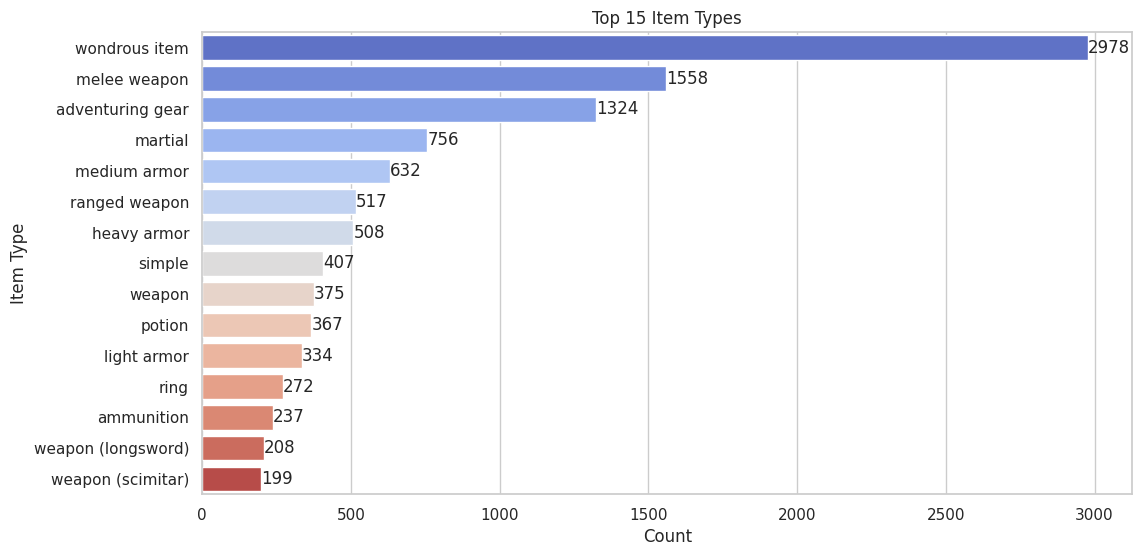

In [58]:
# Item Type Distribution (Top 15)
plt.figure(figsize=(12, 6))
type_counts = items_df_n['Item Type'].value_counts().head(15)
sns.barplot(x=type_counts.values, y=type_counts.index, palette='coolwarm')
plt.title('Top 15 Item Types')
plt.xlabel('Count')
plt.ylabel('Item Type')
for i, v in enumerate(type_counts.values):
    plt.text(v + 0.2, i, str(v), va='center', ha='left')
plt.show()

/tmp/ipykernel_136693/1490598093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=items_df_n, x='Item Rarity', palette='viridis', order=rarity_order)


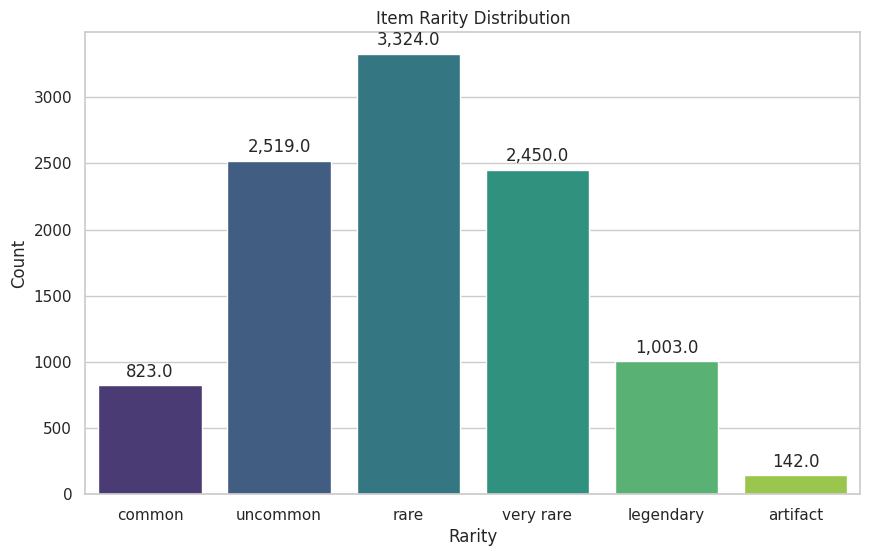

/tmp/ipykernel_136693/1490598093.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_50_rarities, x='Item Rarity', palette='viridis', order=top_50_rarities_order)


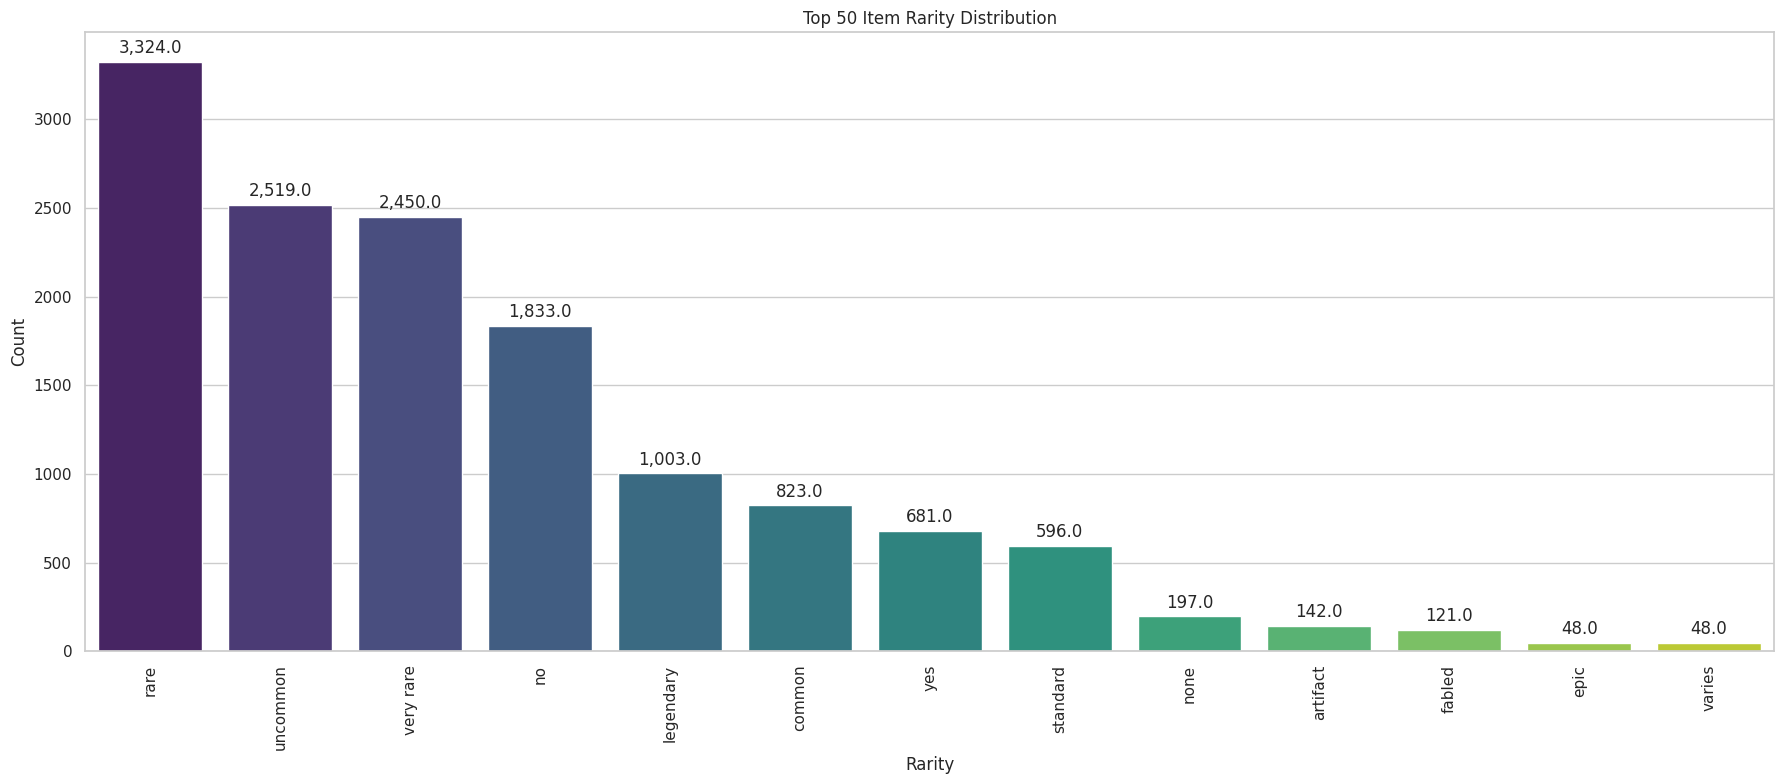

In [69]:
# Item Rarity Distribution
plt.figure(figsize=(10, 6))
rarity_order = ['common', 'uncommon', 'rare', 'very rare', 'legendary', 'artifact']
# Filter for known rarities to keep plot clean
valid_rarities = [r for r in rarity_order if r in items_df_n['Item Rarity'].unique()]
sns.countplot(data=items_df_n, x='Item Rarity', palette='viridis', order=rarity_order)
plt.title('Item Rarity Distribution')
plt.xlabel('Rarity')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), ","), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

top_50_rarities_order = items_df_n['Item Rarity'].value_counts().nlargest(13).index
df_top_50_rarities = items_df_n[items_df_n['Item Rarity'].isin(top_50_rarities_order)]

plt.figure(figsize=(18, 8))
sns.countplot(data=df_top_50_rarities, x='Item Rarity', palette='viridis', order=top_50_rarities_order)
plt.title('Top 50 Item Rarity Distribution')
plt.xlabel('Rarity')
plt.ylabel('Count')
plt.xticks(rotation=90)
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), ","), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


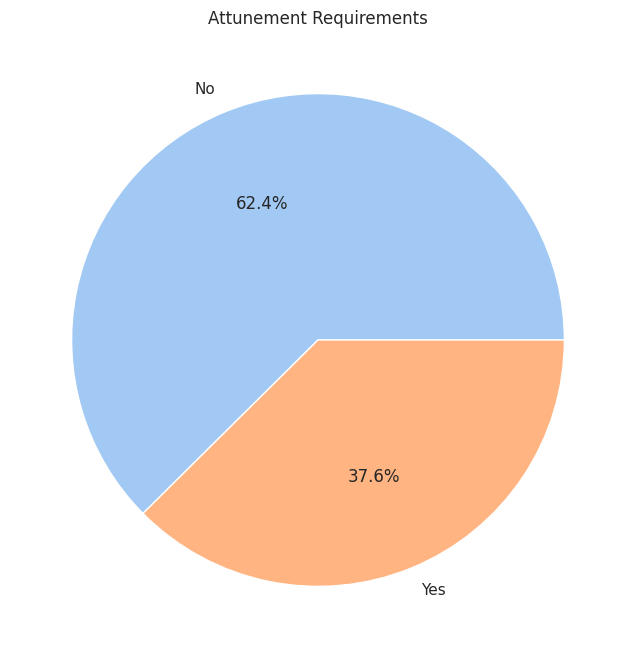

In [71]:
# Attunement Requirement
plt.figure(figsize=(8, 8))
attune_counts = items_df_n['Requires Attunement'].fillna('No').apply(lambda x: 'Yes' if x != 'No' else 'No').value_counts()

# Simplify to Yes/No if values are verbose, but countplot handles strings fine usually
plt.pie(attune_counts, labels=attune_counts.index.astype(str).str[:20], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Attunement Requirements')

plt.show()

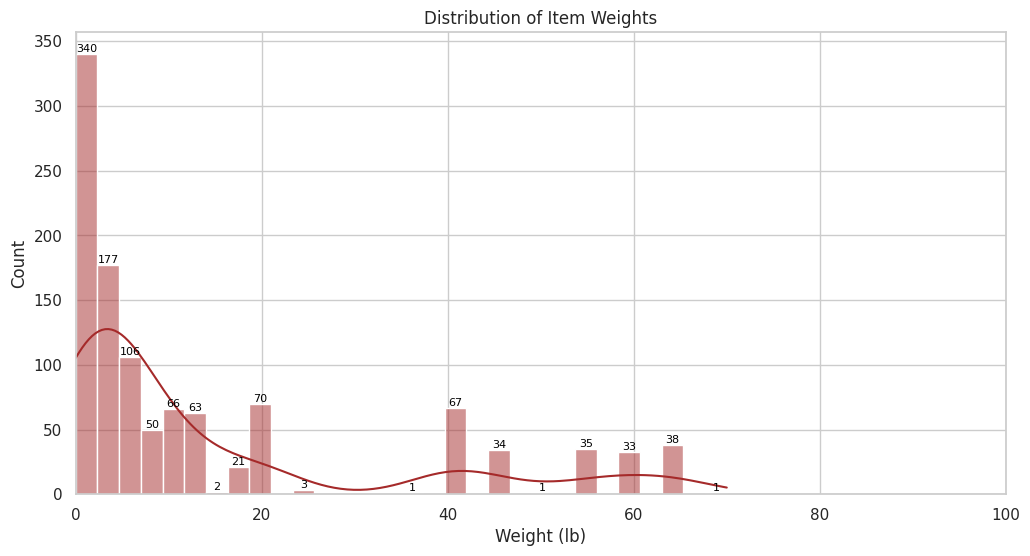

In [85]:
# Weight Distribution
# Convert to numeric, forcing errors to coerce
items_df_n['Weight_Num'] = pd.to_numeric(items_df_n['Weight'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.histplot(data=items_df_n, x='Weight_Num', bins=30, kde=True, color='brown')
plt.title('Distribution of Item Weights')
plt.xlabel('Weight (lb)')
plt.xlim(0, 100) # Limit x-axis to filter out extreme outliers for readability
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8, color='black')

plt.show()

/tmp/ipykernel_136693/241628328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dmg_counts.values, y=dmg_counts.index, palette='Reds_d')


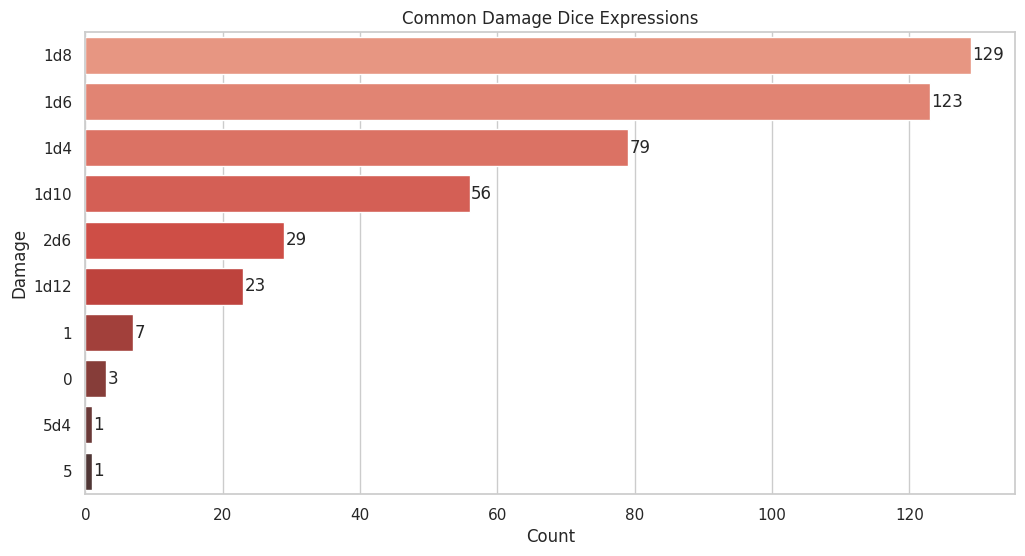

In [87]:
# Damage Dice Distribution (Top 10)
plt.figure(figsize=(12, 6))
dmg_counts = items_df_n['Damage'].dropna().value_counts().head(10)
sns.barplot(x=dmg_counts.values, y=dmg_counts.index, palette='Reds_d')
plt.title('Common Damage Dice Expressions')
plt.xlabel('Count')
plt.ylabel('Damage')
for i, v in enumerate(dmg_counts.values):
    plt.text(v + 0.2, i, str(v), va='center', ha='left')
plt.show()

/tmp/ipykernel_136693/1138090051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subtype_counts.values, y=subtype_counts.index, palette='Blues')


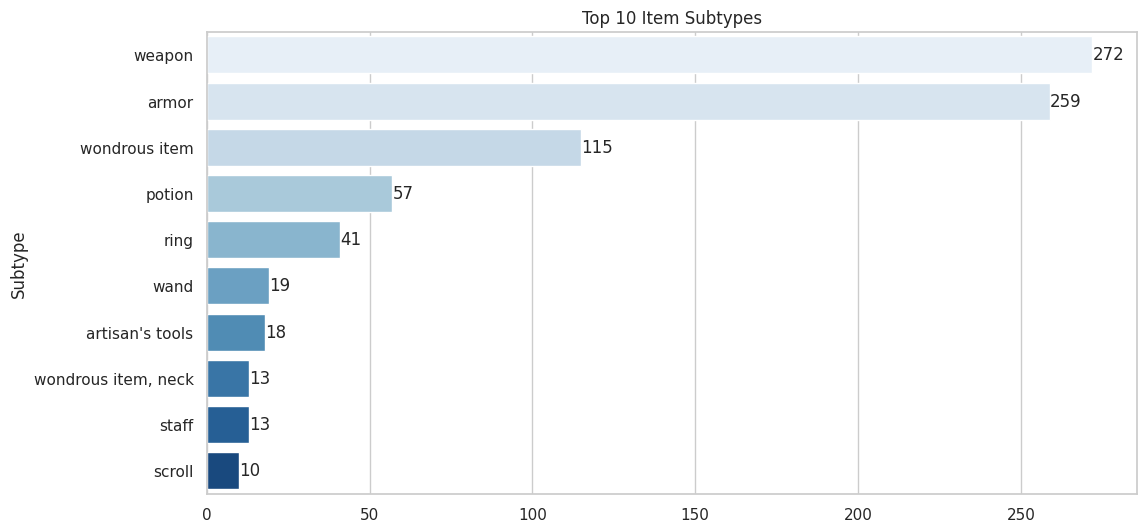

In [88]:
# Subtype Distribution
plt.figure(figsize=(12, 6))
subtype_counts = items_df_n['Subtype'].dropna().value_counts().head(10)
sns.barplot(x=subtype_counts.values, y=subtype_counts.index, palette='Blues')
plt.title('Top 10 Item Subtypes')
for i, v in enumerate(subtype_counts.values):
    plt.text(v + 0.01, i, str(v), va='center', ha='left')
plt.show()

/tmp/ipykernel_136693/247458108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.values, y=theme_counts.index, palette='Greens')


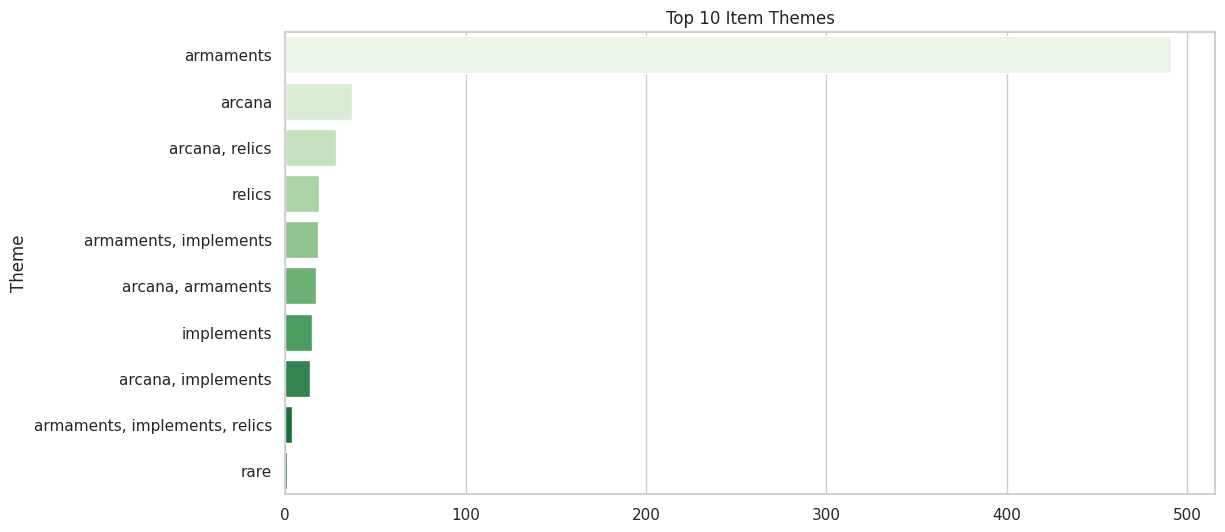

In [39]:
# Theme Distribution
plt.figure(figsize=(12, 6))
theme_counts = items_df_n['Theme'].dropna().value_counts().head(10)
sns.barplot(x=theme_counts.values, y=theme_counts.index, palette='Greens')
plt.title('Top 10 Item Themes')
plt.show()

/tmp/ipykernel_136693/3829137665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=items_df_n.dropna(subset=['AC_Num']), x='AC_Num', palette='gray')


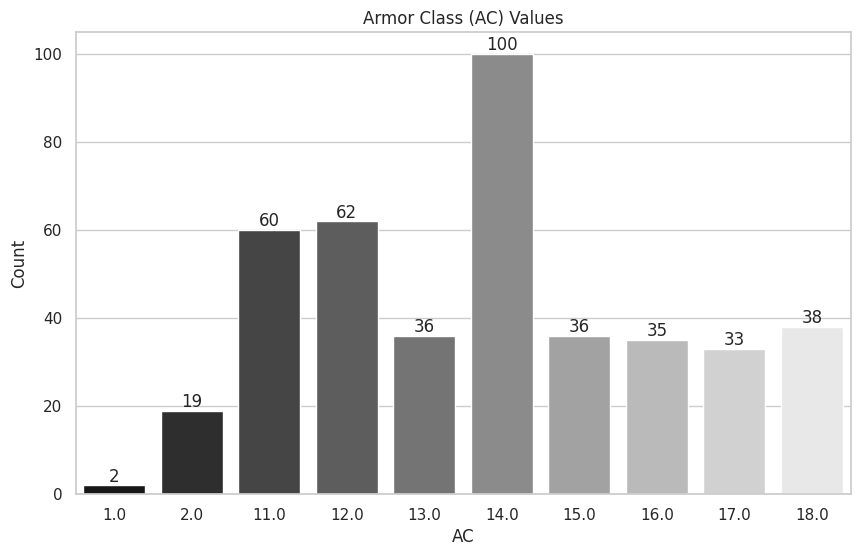

In [ ]:
# AC Distribution
items_df_n['AC_Num'] = pd.to_numeric(items_df_n['AC'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.countplot(data=items_df_n.dropna(subset=['AC_Num']), x='AC_Num', palette='gray')
plt.title('Armor Class (AC) Values')
plt.xlabel('AC')
plt.ylabel('Count')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()

/tmp/ipykernel_136693/3740296863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dur_counts.values, y=dur_counts.index, palette='Oranges')


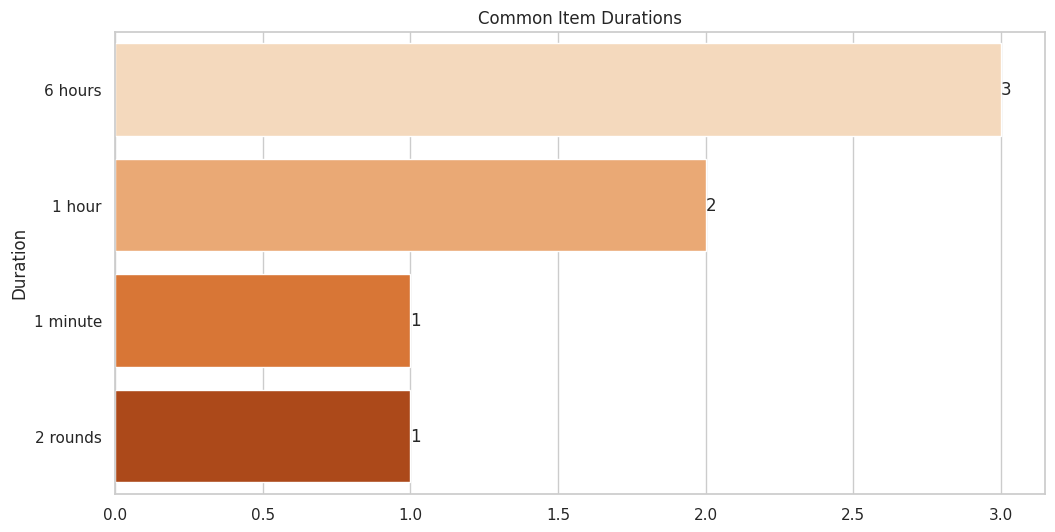

In [95]:
# Duration Distribution
plt.figure(figsize=(12, 6))
dur_counts = items_df_n['Duration'].dropna().value_counts().head(10)
sns.barplot(x=dur_counts.values, y=dur_counts.index, palette='Oranges')
plt.title('Common Item Durations')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()

/tmp/ipykernel_136693/1381186415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dmg_type_counts.values, y=dmg_type_counts.index, palette='YlOrRd')


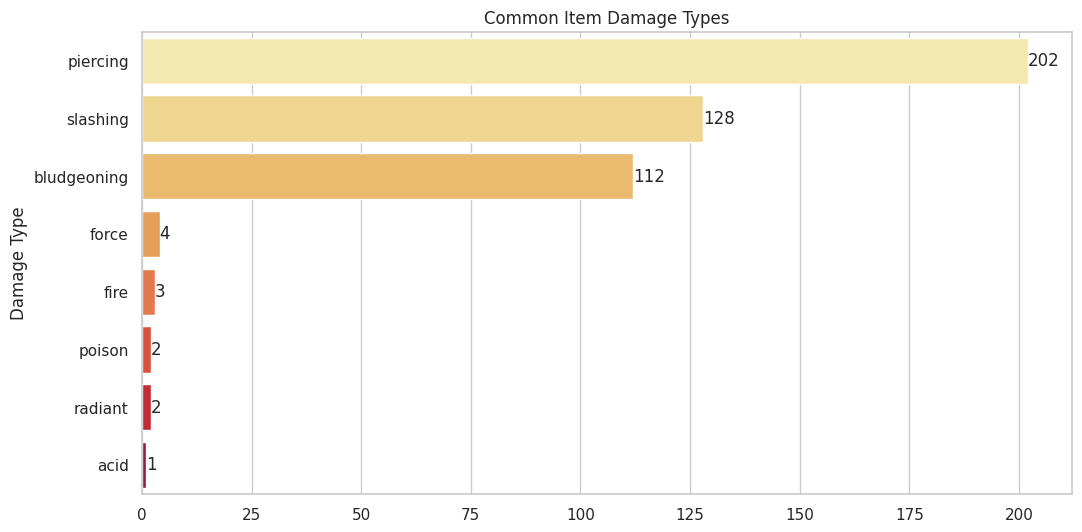

In [99]:
# Damage Type Distribution
plt.figure(figsize=(12, 6))
dmg_type_counts = items_df_n['Damage Type'].dropna().value_counts()
sns.barplot(x=dmg_type_counts.values, y=dmg_type_counts.index, palette='YlOrRd')
plt.title('Common Item Damage Types')
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()